# <center>Les algorithmes des plus proches voisins</center>

Nous allons dans cet exercice utiliser un dictionnaire comportant des données de 100 patients. Un médecin qui est notre expert dans cet exercice a regroupé l'ensemble des informations sous la forme:  
 <center>{ "patientxx": (39, 9, "grippe"), ...}</center>  
Pour chaque patient, nous disposons comme clé le numéro du patient et comme valeur un tuple regroupant les informations suivantes __(Température, Nombre de quintes de toux par jour, Nom de la maladie)__.  
Pour des raisons de simplicité, nous avons limité l'étude à deux maladies __(Grippe et Coqueluche)__ et à deux symptomes (Température, Nombre de quintes de toux par jour) par patient.  
Il est évident que deux symptomes ne suffisent pas à un médecin pour établir un diagnostic mais cela nous permet d'avoir un modèle simple pour démarrer un algorithme des plus proches voisins.  




Nous allons dans un premier temps importer les librairies utiles pour réaliser cet exercice. (Attention, vous devrez exécuter chaque cellule dans l'ordre pour que l'exercice puisse être mené à bien. 

In [2]:
import matplotlib.pyplot as plt
import math

Voici le dictionnaire que notre expert nous a envoyé. Il représentera notre __jeu d'apprentissage__ 

In [3]:
donnees_medecin = {"patient1": (39, 18, "grippe"), "patient2": (37.2, 35, "coqueluche"), "patient3": (38.2, 25, "grippe"), "patient4": (37.6, 40, "coqueluche"),
                   "patient5": (38.9, 32, "grippe"), "patient6": (37.7, 43, "coqueluche"), "patient7": (39.5, 18, "grippe"), "patient8": (37.4, 49, "coqueluche"),
                   "patient9": (39.9, 25, "grippe"), "patient10": (36.9, 38, "coqueluche"), "patient11": (39.5, 4, "grippe"), "patient12": (37.9, 83, "coqueluche"),
                   "patient13": (39.2, 6, "grippe"), "patient14": (37.1, 40, "coqueluche"), "patient15": (38.2, 34, "grippe"), "patient16": (37.8, 46, "coqueluche"),
                   "patient17": (39, 25, "grippe"), "patient18": (37.3, 30, "coqueluche"), "patient19": (39.3, 2, "grippe"), "patient20": (37.6, 83, "coqueluche"),
                   "patient21": (38.9, 26, "grippe"), "patient22": (37.0, 49, "coqueluche"), "patient23": (38.6, 25, "grippe"), "patient24": (37.1, 77, "coqueluche"),
                   "patient25": (39.4, 21, "grippe"), "patient26": (37.4, 55, "coqueluche"), "patient27": (38.7, 13, "grippe"), "patient28": (37.3, 66, "coqueluche"),
                   "patient29": (40, 3, "grippe"), "patient30": (37.7, 53, "coqueluche"), "patient31": (39.7, 10, "grippe"), "patient32": (37.0, 47, "coqueluche"),
                   "patient33": (38.3, 20, "grippe"), "patient34": (36.8, 44, "coqueluche"), "patient35": (39, 1, "grippe"), "patient36": (37.0, 84, "coqueluche"),
                   "patient37": (39.6, 6, "grippe"), "patient38": (37.1, 53, "coqueluche"), "patient39": (38.4, 14, "grippe"), "patient40": (37.6, 80, "coqueluche"),
                   "patient41": (39.5, 3, "grippe"), "patient42": (37.5, 71, "coqueluche"), "patient43": (39.9, 7, "grippe"), "patient44": (37.4, 69, "coqueluche"),
                   "patient45": (39.6, 10, "grippe"), "patient46": (37.0, 75, "coqueluche"), "patient47": (39.8, 6, "grippe"), "patient48": (37.4, 33, "coqueluche"),
                   "patient49": (39.9, 20, "grippe"), "patient50": (37.1, 66, "coqueluche"), "patient51": (38.1, 34, "grippe"), "patient52": (37.2, 52, "coqueluche"),
                   "patient53": (38.9, 27, "grippe"), "patient54": (37.4, 73, "coqueluche"), "patient55": (39.2, 1, "grippe"), "patient56": (37.4, 82, "coqueluche"),
                   "patient57": (38.2, 20, "grippe"), "patient58": (37.6, 82, "coqueluche"), "patient59": (39.8, 23, "grippe"), "patient60": (37.6, 78, "coqueluche"),
                   "patient61": (39.7, 25, "grippe"), "patient62": (37.2, 51, "coqueluche"), "patient63": (39.7, 22, "grippe"), "patient64": (37.4, 81, "coqueluche"),
                   "patient65": (38.6, 3, "grippe"), "patient66": (37.4, 84, "coqueluche"), "patient67": (38.4, 10, "grippe"), "patient68": (37.8, 59, "coqueluche"),
                   "patient69": (39.1, 7, "grippe"), "patient70": (37.0, 37, "coqueluche"), "patient71": (39.1, 8, "grippe"), "patient72": (37.5, 24, "coqueluche"),
                   "patient73": (38.3, 28, "grippe"), "patient74": (37.9, 40, "coqueluche"), "patient75": (39.7, 12, "grippe"), "patient76": (37.5, 51, "coqueluche"),
                   "patient77": (39.8, 5, "grippe"), "patient78": (37.3, 58, "coqueluche"), "patient79": (40.1, 22, "grippe"), "patient80": (36.9, 58, "coqueluche"),
                   "patient81": (40.1, 28, "grippe"), "patient82": (36.9, 70, "coqueluche"), "patient83": (39.0, 11, "grippe"), "patient84": (37.2, 39, "coqueluche"),
                   "patient85": (40, 6, "grippe"), "patient86": (37.1, 47, "coqueluche"), "patient87": (39.9, 9, "grippe"), "patient88": (37.0, 40, "coqueluche"),
                   "patient89": (40.2, 15, "grippe"), "patient90": (37.6, 58, "coqueluche"), "patient91": (39.7, 4, "grippe"), "patient92": (37.6, 55, "coqueluche"),
                   "patient93": (40.3, 3, "grippe"), "patient94": (36.8, 42, "coqueluche"), "patient95": (39.3, 13, "grippe"), "patient96": (36.8, 66, "coqueluche"),
                   "patient97": (39, 8, "grippe"), "patient98": (37.2, 39, "coqueluche"), "patient99": (40, 14, "grippe"), "patient100": (37.8, 44, "coqueluche")}

### Question 1  
Nous allons dans un premier temps nous familariser avec la structure __donnees_medecin__.  

Créez une fonction __recup_valeurs__ qui permet de récupérer les tuples de valeurs des patients. 

Ainsi, `recup_valeurs()`  
donnera:  

dict_values([(39, 18, 'grippe'), (37.2, 35, 'coqueluche'), (38.2, 25, 'grippe'), (37.6, 40, 'coqueluche'), (38.9, 32, 'grippe'), (37.7, 43, 'coqueluche'), (39.5, 18, 'grippe'), (37.4, 49, 'coqueluche'), (39.9, 25, 'grippe'), (36.9, 38, 'coqueluche'), (39.5, 4, 'grippe'), (37.9, 83, 'coqueluche'), (39.2, 6, 'grippe'), (37.1, 40, 'coqueluche'), (38.2, 34, 'grippe'), (37.8, 46, 'coqueluche'), (39, 25, 'grippe'), (37.3, 30, 'coqueluche'), (39.3, 2, 'grippe'), (37.6, 83, 'coqueluche'), (38.9, 26, 'grippe'), (37.0, 49, 'coqueluche'), (38.6, 25, 'grippe'), (37.1, 77, 'coqueluche'), (39.4, 21, 'grippe'), (37.4, 55, 'coqueluche'), (38.7, 13, 'grippe'), (37.3, 66, 'coqueluche'), (40, 3, 'grippe'), ...])  

Complétez la fonction ci-dessous:  
[Si vous en avez besoin: Aide](./Aides/question1.ipynb)

In [4]:
def recup_valeurs():
    """
    Fonction qui renvoie une structure comportant les valeurs du dictionnaire.
    : param : None
    : return : structure comportant les valeurs du dictionnaire.
    : rtype : Pseudo liste de tuples(Float, int, str)
    """
    valeurs_dico = donnees_medecin.values()
    return valeurs_dico

recup_valeurs()

dict_values([(39, 18, 'grippe'), (37.2, 35, 'coqueluche'), (38.2, 25, 'grippe'), (37.6, 40, 'coqueluche'), (38.9, 32, 'grippe'), (37.7, 43, 'coqueluche'), (39.5, 18, 'grippe'), (37.4, 49, 'coqueluche'), (39.9, 25, 'grippe'), (36.9, 38, 'coqueluche'), (39.5, 4, 'grippe'), (37.9, 83, 'coqueluche'), (39.2, 6, 'grippe'), (37.1, 40, 'coqueluche'), (38.2, 34, 'grippe'), (37.8, 46, 'coqueluche'), (39, 25, 'grippe'), (37.3, 30, 'coqueluche'), (39.3, 2, 'grippe'), (37.6, 83, 'coqueluche'), (38.9, 26, 'grippe'), (37.0, 49, 'coqueluche'), (38.6, 25, 'grippe'), (37.1, 77, 'coqueluche'), (39.4, 21, 'grippe'), (37.4, 55, 'coqueluche'), (38.7, 13, 'grippe'), (37.3, 66, 'coqueluche'), (40, 3, 'grippe'), (37.7, 53, 'coqueluche'), (39.7, 10, 'grippe'), (37.0, 47, 'coqueluche'), (38.3, 20, 'grippe'), (36.8, 44, 'coqueluche'), (39, 1, 'grippe'), (37.0, 84, 'coqueluche'), (39.6, 6, 'grippe'), (37.1, 53, 'coqueluche'), (38.4, 14, 'grippe'), (37.6, 80, 'coqueluche'), (39.5, 3, 'grippe'), (37.5, 71, 'coqueluc

### Question 2  

Nous allons maintenant créer une fonction __calcul_distance__ qui va calculer la distance entre un point de donnée mystère (patient mystère) et un point de donnée (patient) du jeu d'apprentisage. Pour tester notre fonction, le point de donnée mystère aura pour tuple de valeurs `(39, 18, 'inconnue')` ce qui correspond à (Température, Nombre de quintes de toux par jour, Maladie)

Pour rappel, la distance sera calculer à l'aide de la formule de la distance Euclidienne:  

distance$=\sqrt{(Température(mystere)-Température(patient))^2+(quinteToux(mystere)-quinteToux(patient))^2}$  

En réalité, il est rare de pouvoir appliquer directement cette formule car les grandeurs qu'on utilise ont des étendues différentes. Par exemple, dans notre cas, la température varie de 36,8° à 40,3° soit une amplitude de 3,5° alors que pour la toux, la plage est de 1 à 84 soit une amplitude de 83.  

Si on utilise directement la formule de distance Euclidienne, le paramètre toux aura beaucoup plus d'impact que le paramètre température. Pour compenser cela, on calcule le ratio 83/3,5.  
Si on multiplie les températures par ce ratio, les paramètres températures et toux auront le même impact sur le calcul de la distance.  

On va donc utiliser la formule:  

distance = $\sqrt{((Température(mystere)-Température(patient))*83/3.5)^2+(quinteToux(mystere)-quinteToux(patient))^2}$  

La fonction __calcul_distance__ comportera deux paramètres qui sont des tuples. Le premier paramètre sera le point de donnée mystère (Température_mystère, toux_mystère, 'inconnue') et le second paramètre sera un point de donnée du jeu d'apprentissage (dans le dictionnaire __donnees_medecin__) par exemple (37.2, 35, 'coqueluche')qui est le patient 2.  

- Nous créerons les variables utiles pour faire le calcul de la distance.  

- Nous calculerons la distance avec la formule de la distance Euclidienne modifiée.  

- La fonction renverra un tuple qui comportera comme premier terme la valeur de la distance et en second l'étiquette de la classe (nom de la maladie)du point de donnée du jeu d'aprentissage. (Ici le patient 2)

Ainsi, `calcul_distance((39, 18, 'inconnue'), (37.2, 35, 'coqueluche'))`  
donnera:  
(45.94638401530229, 'coqueluche')  
[Si vous en avez besoin: Aide](./Aides/question2.ipynb)

In [5]:
def calcul_distance(mystere, element):
    """
    Fonction qui calcule la distance entre l'élément mystère et l'élément du jeu d'apprentissage.
    : param tuple : tuple comportant la température, le nombre de quintes de toux et le type de maladie
    : type param : (float, int, str)
    : return tuple : retourne un tuple comportant (La distance qui sépare l'élément mystere
      de l'élément du jeu d'apprentissage, nom de la maladie)
    : rtype : tuple(float, str)
    """
    
    distance = math.sqrt(((mystere[0]-element[0])*83/3.5)**2+(mystere[1]-element[1])**2) 
    return (distance,element[2])

calcul_distance((39, 18, 'inconnue'), (37.2, 35, 'coqueluche'))

(45.94638401530229, 'coqueluche')

#### Question 3  

Maintenant que nous pouvons calculer la distance entre deux points de donnée, nous allons calculer les distances entre un point de donnée mystère et tous les points de donnée du jeu d'apprentissage.  

Pour cela nous allons créer la fonction __toutes_les_distances__ qui aura pour paramètre un tuple (température, quinte de toux, 'inconnue') qui représente le point de donnée mystère (patient mystère). Cette fonction va retourner une liste de tuples (distance, maladie) triée par ordre croissant de distance.  
- distance: représente la distance entre le point de donnée mystère et un point d donnée du jeu d'aprentissage  
- maladie: représente la maladie du patient du jeu d'apprentissage (Etiquette de la classe à laquelle appartient le point de donnée du jeu d'apprentissage)  

Pour cela nous disposons de:  
- dictionnaire __donnees_medecin__ 
- la fonction __calcul_distance__
- La fonction __recup_valeurs()__ qui retourne une struture itérable sur les valeurs du dictionnaire donnees_medecin  
- Nous prendrons comme __patient_mystere__ le patient (38.8, 13, 'inconnue'). (Par exemple)   
- Nous disposons de la fonction __sorted()__ qui triera les tuples par ordre croissant de distance.

Ainsi `toutes_les_distances((38.8, 13, 'inconnue'))`  
donnera:  
[(2.3714285714284364, 'grippe'),  
 (5.14729966852054, 'grippe'),  
 (6.891639418712478, 'grippe'),  
 (6.891639418712478, 'grippe'),  
 (8.695577107040753, 'grippe'),  
 (9.306613843095201, 'grippe'),  
 (9.538279483754051, 'grippe'),  
 (9.948807743152113, 'grippe'),  
 (11.06773210181517, 'grippe'),  
 ...  
 ]  

[Si vous en avez besoin: Aide](./Aides/question3.ipynb)

In [24]:
def toutes_les_distances(patient_mystere):
    """
    Fonction qui renvoie une liste de tuples triée par ordre croissant des distances.
    : param : Le patient mystère qui est un tuple comportant (Température, nombre de quintes de toux, 'inconnue')
    : type param : tuple(float, int, str)
    : return : liste de tuples triée par ordre croissant des distances.
    : rtype : list(tuple)
    """
    liste_tuples=[]
    for patient in recup_valeurs():
        distance = calcul_distance(patient_mystere,patient)
        liste_tuples.append((distance,patient[2]))
    liste_tuples=sorted(liste_tuples)
    return liste_tuples

toutes_les_distances((38.8, 13, 'inconnue'))

[(2.3714285714284364, 'grippe'),
 (5.14729966852054, 'grippe'),
 (6.891639418712478, 'grippe'),
 (6.891639418712478, 'grippe'),
 (8.695577107040753, 'grippe'),
 (9.306613843095201, 'grippe'),
 (9.538279483754051, 'grippe'),
 (9.948807743152113, 'grippe'),
 (11.06773210181517, 'grippe'),
 (11.788925969324206, 'grippe'),
 (11.857142857142858, 'grippe'),
 (12.90328229085724, 'grippe'),
 (12.903282290857302, 'grippe'),
 (12.903282290857302, 'grippe'),
 (13.214525094356887, 'grippe'),
 (13.769235154310275, 'grippe'),
 (14.199425110524295, 'grippe'),
 (15.296364780895056, 'grippe'),
 (15.85724581691144, 'grippe'),
 (16.173800936536033, 'grippe'),
 (16.32336499922611, 'grippe'),
 (17.336666346215534, 'grippe'),
 (18.613227686190147, 'grippe'),
 (18.88279640307553, 'grippe'),
 (19.120455976118713, 'grippe'),
 (19.14741949896612, 'grippe'),
 (19.20716277956794, 'grippe'),
 (19.37937047481167, 'grippe'),
 (20.221649340269455, 'grippe'),
 (21.36627134107432, 'grippe'),
 (21.552669231916816, 'grip

### Question 4  

Nous allons maintenant essayer de donner une prédiction sur la classe du point de donnée mystère et le pourcentage de cette classe majoritaire calculé à partir des plus proches voisins. Pour cela, nous allons créer une fonction __reponse()__ qui va prendre comme paramètres le nombre de voisins pris en compte noté k (C'est à dire le nombre de points de donnée du jeu d'apprentissage qu'on va prendre pour réaliser notre prédiction) et le point de donnée mystère sous la forme d'un tuple(Température, Nombre de toux par jour, 'inconnue').  
Nous disposons de toutes les fonctions écrites précédement et cette fonction devra retourner un tuple (Nom de la maladie, Pourcentage de la classe majoritaire)  

La prédiction sur la maladie se fera de la façon suivante:  
- On dénombre parmi les voisins sélectionnés les plus proches ceux qui ont la grippe et ceux qui ont la coqueluche.  
- Si il y a plus de voisins qui ont la grippe, on prédira que le patient mystère doit avoir la grippe.  
- Si il y a plus de voisins qui ont la coqueluche alors on prédira la coqueluche pour le patient mystère.  
On pourrait améliorer notre modèle en affectant des pondérations en fonction de la distance mais nous nous limiterons à notre approche dans cet exercice.  

Pour calculer le pourcentage de la classe majoritaire :  
- Si le patient mystère a la grippe, nous calculerons le pourcentage de voisins qui ont la grippe parmi les k voisins choisis.  
- Si le patient mystère a la coqueluche, nous calculerons le pourcentage de voisins qui ont la coqueluche.  

Nous pourrons utiliser la fonction round() qui permettra de fixer le nombre de décimales pour le taux de fiabilité. `round(valeur, 2)`réalisera un arrondi au centième.   

Ainsi `reponse(60,(39, 14, 'inconnue'))`  
Donnera:  
('grippe', '83.33%')

[Si vous en avez besoin: Aide](./Aides/question4.ipynb)

In [27]:
def reponse(k, patient_mystere):
    """
    Fonction qui réalise une prédiction sur la maladie et calcule un taux de confiance.
    : param : nombre de voisins pris pour réaliser la prédiction. tuple regroupant les données du patient mystère
    (Température, Nombre de quintes de toux, 'inconnue')
    : type param : int, tuple(float, int, str)
    : return : renvoie un tuple comportant: (nom de la maladie, Taux de confiance)
    : rtype : tuple(str, str)
    """
    ttes_les_dist = toutes_les_distances(patient_mystere) # liste de tuples
    nbre_grippe= 0
    nbre_coqueluche = 0
    for i in range(k):
        # on isole un tuple avec [i], je prend l'indice 1 pour obtenir la classe maladie
        if ttes_les_dist[i][1]=='grippe':  
            nbre_grippe= nbre_grippe + 1
        else:
            nbre_coqueluche = nbre_coqueluche + 1
    if nbre_grippe>nbre_coqueluche :
        return ('grippe',str(nbre_grippe*100/k)+'%')
    else:
        return ('coqueluche',str(nbre_coqueluche*100/k)+'%')        

reponse(60,(39, 14, 'inconnue'))        

('grippe', '83.33333333333333%')

### Question 5  

Nous allons maintnant nous intéresser à l'affichage graphique. Nous aimerions réaliser un graphique qui nous montre l'ensemble des points de donnée du jeu d'apprentissage, le point de donnée mystère mais aussi l'ensemble des voisins qui a été sélectionné pour réaliser la prédiction de la classe (maladie). Nous placerons en abscisse la température et en ordonnée le nombre de quintes de toux par jour.  

Pour cela, nous allons procéder en plusieurs étapes:  

#### Préparation des tableaux de coordonnées des points.  

Vous allez créer une fonction __tableau_coordonnees__ qui possède deux paramètres. Le premier paramètre est un entier qui, pour la valeur 0, correspondra aux températures et pour la valeur 1 au nombre de quinte de toux par jour. Le deuxième paramètre pourra prendre deux valeurs 'grippe' ou 'coqueluche'. La fonction va renvoyer une liste de flottants ou d'entiers. (Soit une liste regroupant les tempérautres des grippés, soit une liste regroupant les températures des patients atteints de la coqueluche, soit une liste regroupant le nombre de quintes de toux des grippés, soit une liste regroupant le nombre de quintes de toux des patients atteints de la coqueluche.) 

Ainsi, `tableau_coordonnees(0, 'grippe')`

donnera:  

[39,  
 38.2,  
 38.9,  
 39.5,  
 39.9,  
 39.5,  
 39.2,  
 38.2,  
 39,  
 ...  
 ]  
 
Cela représente donc les abscisses des points représentant les patients grippés. `tableau_coordonnees(1, 'grippe')` nous donnera les ordonnées. Nous ferons de même pour les patients atteints par la coqueluche.  

[Si vous en avez besoin: Aide](./Aides/question5.ipynb)

In [34]:
def tableau_coordonnees(nombre, maladie):
    """
    Fonction qui renvoie une liste de coordonnées. Par exemple toutes les abscisses des patients grippés.
    : param : nombre qui est soit 0 ou 1 (0 pour abscisse et 1 pour ordonnée), nom de la maladie (grippe ou coqueluche)
    : type param : int, str
    : return : liste de flottants 
    : rtype : list(float)
    """
    coordonnees = []
    valeurs = recup_valeurs()
    for patient in valeurs:
        if patient[2]== maladie:
            coordonnees.append(patient[nombre])
    return coordonnees

tableau_coordonnees(0, 'grippe')

[39,
 38.2,
 38.9,
 39.5,
 39.9,
 39.5,
 39.2,
 38.2,
 39,
 39.3,
 38.9,
 38.6,
 39.4,
 38.7,
 40,
 39.7,
 38.3,
 39,
 39.6,
 38.4,
 39.5,
 39.9,
 39.6,
 39.8,
 39.9,
 38.1,
 38.9,
 39.2,
 38.2,
 39.8,
 39.7,
 39.7,
 38.6,
 38.4,
 39.1,
 39.1,
 38.3,
 39.7,
 39.8,
 40.1,
 40.1,
 39.0,
 40,
 39.9,
 40.2,
 39.7,
 40.3,
 39.3,
 39,
 40]

#### Tracé d'un cercle avec mathplotlib.  

Nous donnons la fonction qui permet de tracer un cercle avec la librairie mathplotlib. Cette fonction comprend deux paramètres. Le premier paramètre est le tuple de valeurs du point de donnée mystère qui donnera l'abscisse et l'ordonnée du centre du cercle. Le second paramètre est un flottant correspondant au rayon du cercle.  

- Nous définissons deux variables __x_cercle__ et __y_cercle__ qui seront des listes et qui représentent les abscisses et ordonnées des points qui traceront le cercle.
- Nous choisissons 100 points pour tracer ce cercle.  
- Le centre du cercle devra correspondre aux coordonnées du patient mystère.  
- Le rayon sera la distance séparant le point de donnée mystère du dernier voisin choisi pour réaliser la prédiction.  
(Cela correspond à la distance du dernier tuples sélectionné dans __liste_tuples__)

In [35]:
def cercle(centre, rayon):
    """
    Fonction qui crée l'ensemble des points formant un cercle.
    : param : centre qui est un tuple représentant la température et le nombre de quintes de toux du patient mystère.
    rayon qui représente la distance entre le patient mystère et le dernier voisin pris pour la prédiction.
    : type param : tuple(Float, int, str), Float
    : return : None
    """
    x_cercle = []
    y_cercle = []
    for i in range(0, 100):
        angle = math.pi*2*i/99
        x_cercle.append(centre[0] + rayon/(83/3.5)*math.cos(angle))
        y_cercle.append(centre[1] + rayon*math.sin(angle))
    plt.plot(x_cercle, y_cercle)

#### Affichage de l'ensemble.  

Nous allons créer une fonction __affichage__ qui va comporter deux paramètres.  
Le premier paramètre est k. Il représente le nombre de voisins qui contribueront à la prédiction.  
Le deuxième paramètre est le tuple de valeurs du point de donnée mystère (température, Nombre de quinte de toux, 'inconnue').  

1) Dans un premier temps, nous allons créer quatre variables abscisses_grippe, ordonnees_grippe, abscisses_coqueluche et ordonnees_coqueluche. Nous allons utiliser la fonction __tableau_coordonnees__ pour réaliser l'affectation de ces variables.  
(Verifiez par un affichage si vous obtenez bien les listes de coordonnées souhaiteés.)

2) Créer une variable __distances__ qui contiendra la liste de tuples renvoyées par la fonction __toutes_les_distances__. Le paramètre de la fonction sera le tuple du point de donnée mystere.  

3) Il faut fixer la dimension de la zone d'affichage graphique avec la méthode .figure()  
   On pourra fixer les dimensions à 15 pouces par exemple:  

`plt.figure(figsize = (15, 15))`  

4) Appeler la fonction __cercle()__. On n'oubliera pas de renseigner les paramètres de cette fonction.  

5) Vous allez maintenant tracer les points. Pour cela on va utiliser l'instruction plt.plot().  
La méthode `.plot()` prend comme premier paramètre l'abscisse du point, comme deuxième paramètre l'ordonnée du point, comme troisième paramètre le symbole d'affichage ici "o" et comme dernier paramètre l'étiquette "label" où on pourra donner l'étiquette de la classe du point de donnée.  

Par exemple:  `plt.plot(abscisses_grippe, ordonnees_grippe, "o", label = "Grippe")`  
Cette instruction tracera l'ensemble des points des patients atteints par la grippe.  

Vous réaliserez le tracé des points "grippe", "coqueluche" et "Mystère" en utilisant l'exemple ci-dessus qu'on adaptera.  

6) On va ensuite afficher la légende des axes avec les instructions plt.ylabel() et plt.xlabel(). Il suffit de compléter le paramètre de ces instructions avec la chaine de caractères souhaitée.  
Par exemple: `plt.ylabel("Nbr quintes toux")`  

7) Pour afficher l'ensemble des légendes du graphique, on utilise l'instruction `plt.label()`.

8) Enfin pour afficher le graphique, il faut utiliser l'instruction `plt.show()`.  

[Si vous en avez besoin: Aide](./Aides/question5bis.ipynb)  

Par exemple: `affichage(20,(37, 35, 'inconnue'))`  
Donnera:  

<img src = "aides/affichage.png"/>

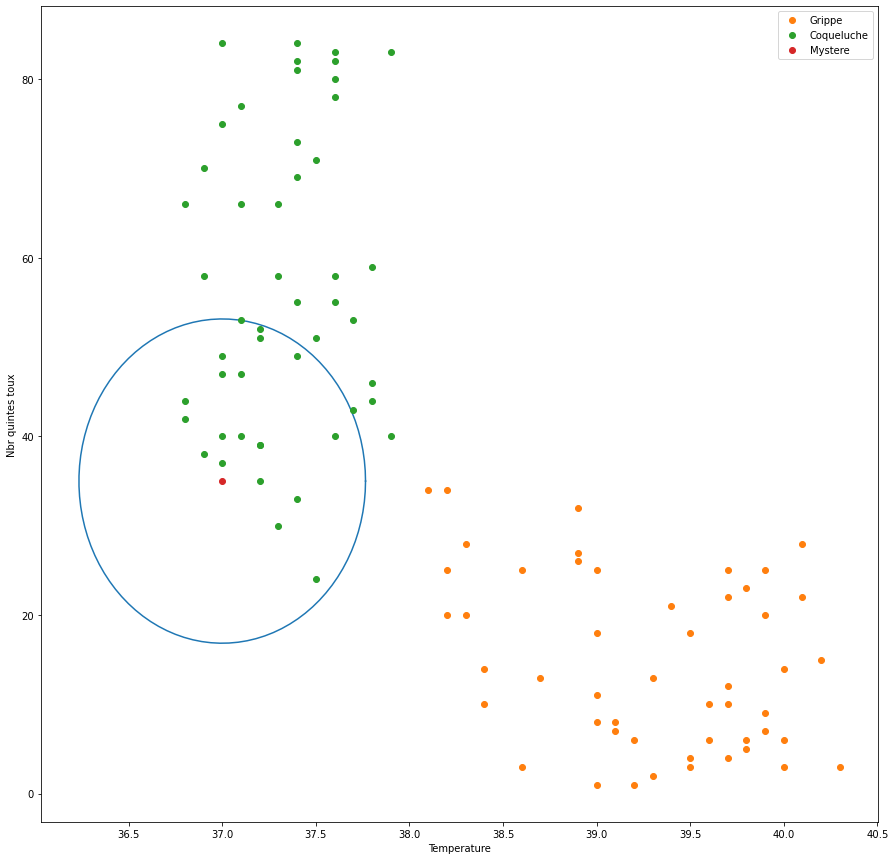

In [40]:
def affichage(k,patient_mystere):
    """
    Fonction qui réalise l'affichage des patients du jeu d'apprentissage, du patient mystère et du cercle
    qui délimite les voisins pris pour réaliser la prédiction.
    : param : k est le nombre de voisins pris pour faire la prédiction,
    patient_mystère est un tuple comportant (Température, Nombre de quintes de toux, 'inconnue')
    : type param : int, tuple(Float, int, str)
    : return : None
    """
    abscisses_grippe= tableau_coordonnees(0, 'grippe')
    ordonnees_grippe= tableau_coordonnees(1, 'grippe')
    abscisses_coqueluche=tableau_coordonnees(0, 'coqueluche')
    ordonnees_coqueluche=tableau_coordonnees(1, 'coqueluche')
    distances= toutes_les_distances(patient_mystere)
    plt.figure(figsize = (15, 15))
    rayon = distances[k-1][0]
    cercle(patient_mystere, rayon)
    plt.plot(abscisses_grippe, ordonnees_grippe, "o", label = "Grippe")
    plt.plot(abscisses_coqueluche, ordonnees_coqueluche, "o", label = "Coqueluche")
    plt.plot(patient_mystere[0], patient_mystere[1], "o", label = "Mystere")
    plt.xlabel("Temperature")
    plt.ylabel("Nbr quintes toux")
    plt.legend()
    plt.show()
affichage(20,(37, 35, 'inconnue'))

### Question 6  

Nous allons maintenant regrouper l'ensemble en créant une fonction __générale__ qui comporte deux paramètres le nombre de voisins k et le patient mystère.  

On utilisera les fonctions __affichage__ et __reponse__.  

Cette fonction retournera une prédiction sur la maladie avec un taux de confiance et un graphique qui justifiera graphiquement l'ensemble.  

[Si vous en avez besoin: Aide](./Aides/question6.ipynb)

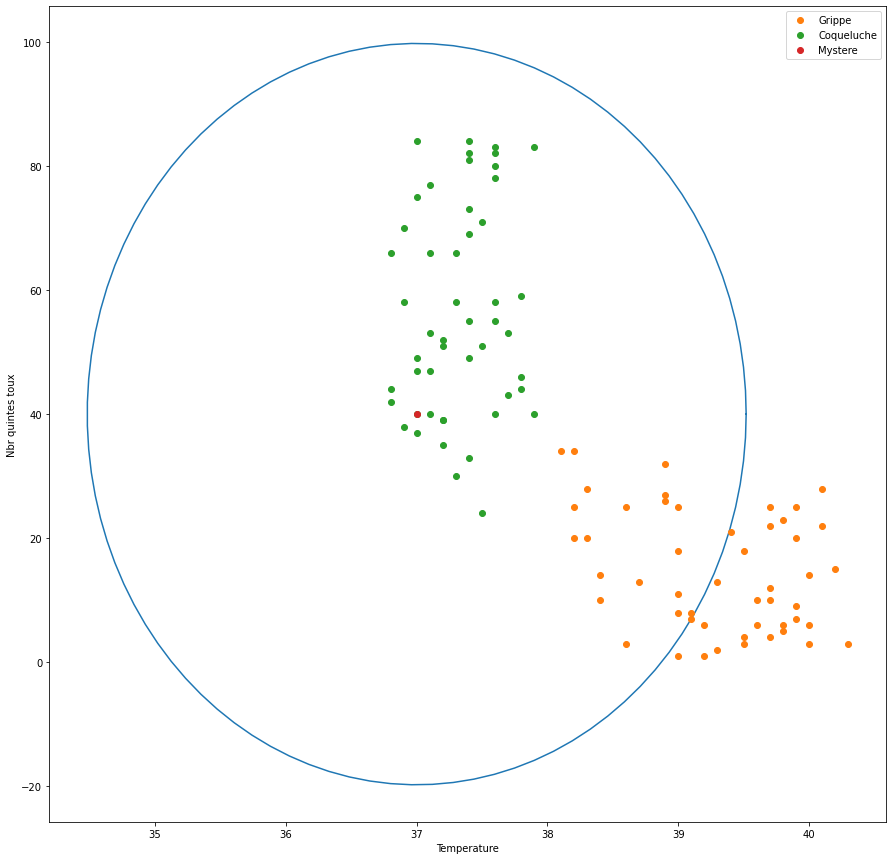

le patient mystere a pour maladie:  coqueluche estimé à 71.42857142857143%


In [44]:
def generale(k, patient_mystere):
    """
    Fonction qui réalise l'affichage graphique et l'affichage de la maladie et du taux de fiabilité.
    : param : k est le nombre de voisins pris pour faire la prédiction,
    patient_mystère est un tuple comportant (Température, Nombre de quintes de toux, 'inconnue')
    : type param : int, tuple(Float, int, str)
    : return : None
    """
    affichage(k,patient_mystere)
    reponse_maladie = reponse(k,patient_mystere)
    print("le patient mystere a pour maladie: ",reponse_maladie[0], "estimé à",reponse_maladie[1] )

generale(70,(37, 40, 'inconnue'))